# Producten week 1-2

In [349]:
# Handige Jupyter magic
%config IPCompleter.greedy = True
%matplotlib inline

In [350]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We beginnen met de vektis data uitlezen, dit zal de core van onze data zijn in de Proof of Concept. Hier heb ik gebruikt gemaakt van een handige functie voor het uitlezen van meerdere jaren. Alle data van voor 2015 valt buiten de scope in verband met veel gaten in die data.

In [351]:
# data uitlezen
def read_vektis_data(dir, start, end):
    dfArray = []

    for i in range(start, end):
        df = pd.read_csv(f'{dir}/vektis_20{i}.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str}, low_memory=False)
        df.columns = df.columns.str.lower()
        df['jaar'] = 2000 + i
        dfArray.append(df)

    return pd.concat(dfArray)

# Read the data - data van voor 2015 mist veel GGZ data en is dus weggelaten
df = read_vektis_data('./Vektis', 15, 21)

# Veel null waarden op kosten_eerstelijnsverblijf, dus die kolom droppen
df = df.drop(columns=['kosten_eerstelijnsverblijf'])

# if column kosten_gzsp is not null then concat kosten_gzsp and kosten_overig into kosten_overig
df['kosten_overig'] = df.apply(lambda row: row['kosten_gzsp'] if pd.notnull(row['kosten_gzsp']) else row['kosten_overig'], axis=1)
df = df.drop(columns=['kosten_gzsp', 'aantal_verzekerdejaren']).dropna()

# Loop through columns with prefix kosten_ and divide by aantal_bsn
for column in df.columns:
    if column.startswith('kosten_'):
        df[column] = df[column] / df['aantal_bsn']


df = df.drop(columns=['aantal_bsn'])

df.info()
df.head()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80352 entries, 1 to 13061
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   geslacht                                80352 non-null  object 
 1   leeftijdsklasse                         80352 non-null  object 
 2   gemeentenaam                            80352 non-null  object 
 3   kosten_medisch_specialistische_zorg     80352 non-null  float64
 4   kosten_farmacie                         80352 non-null  float64
 5   kosten_specialistische_ggz              80352 non-null  float64
 6   kosten_huisarts_inschrijftarief         80352 non-null  float64
 7   kosten_huisarts_consult                 80352 non-null  float64
 8   kosten_huisarts_mdz                     80352 non-null  float64
 9   kosten_huisarts_overig                  80352 non-null  float64
 10  kosten_hulpmiddelen                     80352 non-null  fl

,geslacht,leeftijdsklasse,gemeentenaam,kosten_medisch_specialistische_zorg,kosten_farmacie,kosten_specialistische_ggz,kosten_huisarts_inschrijftarief,kosten_huisarts_consult,kosten_huisarts_mdz,kosten_huisarts_overig,...,kosten_kraamzorg,kosten_verloskundige_zorg,kosten_generalistische_basis_ggz,kosten_langdurige_ggz,kosten_grensoverschrijdende_zorg,kosten_eerstelijns_ondersteuning,kosten_geriatrische_revalidatiezorg,kosten_verpleging_en_verzorging,kosten_overig,jaar
1,M,0 t/m 4 jaar,AA EN HUNZE,1432.550175,96.093534,0.000000,50.920136,26.134854,0.798427,71.224330,...,0.0,0.0,0.0,0.0,0.730039,0.055049,0.000000,0.000000,0.220097,2015
2,M,0 t/m 4 jaar,AALSMEER,827.916232,74.228462,0.000000,50.755552,27.488826,1.815728,69.834601,...,0.0,0.0,0.0,0.0,2.730951,0.014261,0.000000,0.000000,26.364648,2015
3,M,0 t/m 4 jaar,AALTEN,1705.850201,102.138377,0.000000,50.975270,27.501700,0.871932,60.418995,...,0.0,0.0,0.0,0.0,2.409444,0.008346,0.000000,0.645317,6.179598,2015
4,M,0 t/m 4 jaar,ACHTKARSPELEN,808.223511,82.218960,0.000000,51.029337,26.275215,0.106996,73.500741,...,0.0,0.0,0.0,0.0,3.378713,1.087256,0.000000,0.188192,93.063745,2015
5,M,0 t/m 4 jaar,ALBLASSERDAM,3174.560494,151.708995,0.000000,50.308931,27.302360,0.085343,55.984211,...,0.0,0.0,0.0,0.0,3.370271,0.009330,0.000000,424.360638,39.272392,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,V,90+,ZUNDERT,1985.933688,821.332125,0.000000,136.596125,123.659500,126.147625,81.659312,...,0.0,0.0,0.0,0.0,5.261188,0.000000,506.733438,3482.497375,0.804375,2020
13058,V,90+,ZUTPHEN,1672.607306,799.828111,7.502583,147.350278,225.365250,46.149306,148.071111,...,0.0,0.0,0.0,0.0,0.000000,0.000000,417.698167,5357.507917,2.319000,2020
13059,V,90+,ZWARTEWATERLAND,1451.798761,877.228584,0.000000,127.998938,335.271504,124.297257,153.998584,...,0.0,0.0,0.0,0.0,0.000000,0.000000,906.188142,2950.200531,2.387345,2020
13060,V,90+,ZWIJNDRECHT,2462.541943,810.945259,1.772565,123.223238,187.865544,88.758912,99.164845,...,0.0,0.0,0.0,0.0,0.000000,0.000000,925.327202,4505.867565,5.791684,2020


In [352]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kosten_medisch_specialistische_zorg,80352.0,1546.332443,1149.823523,0.000000,575.217654,1172.745875,2326.314292,20324.681818
kosten_farmacie,80352.0,336.932526,287.981003,5.962381,93.382877,226.367017,548.681815,2018.432000
kosten_specialistische_ggz,80352.0,141.291049,144.631874,-56.541872,24.329135,110.090816,213.763369,4839.698333
kosten_huisarts_inschrijftarief,80352.0,72.185823,22.290142,25.167643,58.288560,62.207161,80.940001,183.221667
kosten_huisarts_consult,80352.0,54.047386,44.479654,0.000000,23.972513,42.283737,63.181870,654.891231
kosten_huisarts_mdz,80352.0,41.254401,47.464254,0.000000,4.411829,18.818642,71.302320,1125.451250
kosten_huisarts_overig,80352.0,61.466839,36.802682,13.478679,40.633739,50.485349,67.972776,840.926316
kosten_hulpmiddelen,80352.0,131.887705,152.868546,0.000000,30.446311,58.680956,181.774745,1747.633333
kosten_mondzorg,80352.0,43.140052,45.561866,-0.034941,8.753566,26.239091,57.439183,284.270500
kosten_paramedische_zorg_fysiotherapie,80352.0,35.380653,30.842841,-3.033814,11.987972,28.572406,49.211697,696.496000


Nu de data van Vektis duidelijk is kan er begonnen worden aan het koppelen van de andere data. De eerste data zal de overgewicht data zijn. De kolommen voor overgewicht moeten gelezen worden als percentages.

In [353]:
ov = pd.read_csv('./Rivm/overgewicht.csv', sep=';', na_values='       .').drop(columns=('Marges')).dropna()
ro = pd.read_csv('./Rivm/roken.csv', sep=';', na_values='       .').drop(columns=('Marges')).dropna()
ee = pd.read_csv('./Rivm/eenzaamheid.csv', sep=';', na_values='       .').drop(columns=('Marges')).dropna()
rv = ov.merge(ro, on=['Leeftijd', 'WijkenEnBuurten', 'Perioden', 'Gemeentenaam_1'], how='inner').drop(columns=['ID_y'])
rv = rv.merge(ee, on=['Leeftijd', 'WijkenEnBuurten', 'Perioden', 'Gemeentenaam_1'], how='inner').drop(columns=['ID'])

rv.info()
print(rv.head())

mv = rv.interpolate(method='linear', limit_direction='forward')
mv = mv.astype({ 'Ondergewicht_7': float, 'NormaalGewicht_8': float, 'Overgewicht_9': float, 'ErnstigOvergewicht_10' : float, 'Roker_11' : float, 'Eenzaam_28' : float, 'ErnstigZeerErnstigEenzaam_29' : float, 'EmotioneelEenzaam_30' : float, 'SociaalEenzaam_31' : float }).drop(columns=['ID_x', 'WijkenEnBuurten'])
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893754 entries, 0 to 893753
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID_x                          893754 non-null  int64  
 1   Leeftijd                      893754 non-null  int64  
 2   WijkenEnBuurten               893754 non-null  object 
 3   Perioden                      893754 non-null  object 
 4   Gemeentenaam_1                893754 non-null  object 
 5   Ondergewicht_7                893754 non-null  float64
 6   NormaalGewicht_8              893754 non-null  float64
 7   Overgewicht_9                 893754 non-null  float64
 8   ErnstigOvergewicht_10         893754 non-null  float64
 9   Roker_11                      893754 non-null  float64
 10  Eenzaam_28                    893754 non-null  float64
 11  ErnstigZeerErnstigEenzaam_29  893754 non-null  float64
 12  EmotioneelEenzaam_30          893754 non-nul

In [354]:
leeftijdMeta = pd.read_csv('./Rivm/Metadata/leeftijd.csv', sep=';')
periodenMeta = pd.read_csv('./Rivm/Metadata/perioden.csv', sep=';')
wijkEnBuurt = pd.read_csv('./Rivm/Metadata/brt2020.csv', sep=';', encoding="ISO-8859-1")

In [355]:
def replaceMeta(data, meta, column_to_replace, column_to_use):
    for index, row in meta.iterrows():
        data = data.replace(row[column_to_replace], row[column_to_use])
    return data

mv = replaceMeta(mv, leeftijdMeta, 'Key', 'Title')
mvCombined = replaceMeta(mv, periodenMeta, 'Key', 'Title')

In [356]:
mvCombined['gemeentenaam'] = mvCombined['Gemeentenaam_1'].str.lower().str.strip()
mvCombined['jaar'] = mvCombined['Perioden']
mvCombined.drop(columns=['Gemeentenaam_1', 'Perioden'], inplace=True)
mvCombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893754 entries, 0 to 893753
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Leeftijd                      893754 non-null  object 
 1   Ondergewicht_7                893754 non-null  float64
 2   NormaalGewicht_8              893754 non-null  float64
 3   Overgewicht_9                 893754 non-null  float64
 4   ErnstigOvergewicht_10         893754 non-null  float64
 5   Roker_11                      893754 non-null  float64
 6   Eenzaam_28                    893754 non-null  float64
 7   ErnstigZeerErnstigEenzaam_29  893754 non-null  float64
 8   EmotioneelEenzaam_30          893754 non-null  float64
 9   SociaalEenzaam_31             893754 non-null  float64
 10  gemeentenaam                  893754 non-null  object 
 11  jaar                          893754 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory us

In [357]:
mvCombined.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ondergewicht_7,893754.0,1.965672,1.510709,0.0,1.2,1.7,2.5,25.0
NormaalGewicht_8,893754.0,48.327481,7.842142,7.1,43.7,47.7,52.3,91.7
Overgewicht_9,893754.0,50.046525,8.014604,5.0,46.0,50.8,54.8,92.9
ErnstigOvergewicht_10,893754.0,14.341459,5.083222,0.0,11.3,14.3,17.2,50.0
Roker_11,893754.0,18.370045,6.560326,0.0,14.3,17.8,21.9,76.5
Eenzaam_28,893754.0,42.518262,8.538780,0.0,37.4,42.2,47.4,100.0
ErnstigZeerErnstigEenzaam_29,893754.0,9.286409,4.502547,0.0,6.5,8.9,11.6,58.8
EmotioneelEenzaam_30,893754.0,23.057666,8.014709,0.0,18.0,22.5,27.5,84.6
SociaalEenzaam_31,893754.0,28.784436,6.988868,0.0,24.8,28.4,32.5,82.4
jaar,893754.0,2018.002538,2.000000,2016.0,2016.0,2020.0,2020.0,2020.0


In [358]:
# function that uses regression to fill the missing jaar 2013,2014,2015,2017,2018,2019 values per gemeente and Leeftijd
def fillMissingYears(data, column):
    data[column] = data.groupby(['gemeentenaam', 'Leeftijd'])[column].apply(lambda x: x.fillna(x.resample('A').mean()))
    return data

# apply function for each column except gemeentenaam, Leeftijd and jaar with a loop
for column in mvCombined.columns:
    if column not in ['gemeentenaam', 'Leeftijd', 'jaar']:
        mvI = fillMissingYears(mvCombined, column)


mvI

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
mvI = mvI[mvI['gemeentenaam'] != 'nederland']
mvI = mvI[mvI['jaar'] != 2012]
mvI.info()
mvI

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447424 entries, 0 to 446637
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Leeftijd                      447417 non-null  object 
 1   Ondergewicht_7                447417 non-null  float64
 2   NormaalGewicht_8              447417 non-null  float64
 3   Overgewicht_9                 447424 non-null  float64
 4   ErnstigOvergewicht_10         447417 non-null  float64
 5   Roker_11                      447417 non-null  float64
 6   Eenzaam_28                    447417 non-null  float64
 7   ErnstigZeerErnstigEenzaam_29  447417 non-null  float64
 8   EmotioneelEenzaam_30          447417 non-null  float64
 9   SociaalEenzaam_31             447417 non-null  float64
 10  gemeentenaam                  447417 non-null  object 
 11  jaar                          447424 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory us

,Leeftijd,Ondergewicht_7,NormaalGewicht_8,Overgewicht_9,ErnstigOvergewicht_10,Roker_11,Eenzaam_28,ErnstigZeerErnstigEenzaam_29,EmotioneelEenzaam_30,SociaalEenzaam_31,gemeentenaam,jaar
0,NaN,NaN,NaN,50.643129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
1,NaN,NaN,NaN,50.643129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
2,NaN,NaN,NaN,50.643129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
3,NaN,NaN,NaN,50.643129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
4,NaN,NaN,NaN,50.643129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
297806,18 jaar of ouder,2.7,56.5,46.600000,13.1,14.8,49.6,11.2,32.0,30.2,'s-gravenhage,2020
297805,18 jaar of ouder,2.7,56.5,46.600000,13.1,14.8,43.3,9.0,28.4,26.0,'s-gravenhage,2020
297804,18 jaar of ouder,2.7,56.5,46.600000,13.1,14.8,46.7,10.3,30.4,28.5,'s-gravenhage,2020
297842,18 jaar of ouder,2.1,54.4,43.200000,11.0,14.3,49.1,11.0,31.7,29.8,'s-gravenhage,2020


In [ ]:
def leeftijdToCat(d):
    for index, row in d.iterrows():
        if (row['leeftijdsklasse'] == '15 t/m 19 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '20 t/m 24 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '25 t/m 29 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '30 t/m 34 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '35 t/m 39 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '40 t/m 44 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '45 t/m 49 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '50 t/m 54 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '55 t/m 59 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '60 t/m 64 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '65 t/m 69 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '70 t/m 74 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '75 t/m 79 jaar'):
            d.loc[index, 'Leeftijd'] = '65 jaar of ouder'
        elif (row['leeftijdsklasse'] == '18 jaar of ouder'):
            d.loc[index, 'Leeftijd'] = '65 jaar of ouder'
        elif (row['leeftijdsklasse'] == '85 t/m 89 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '90+'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'

    return d

df['leeftijdsklasse'] = df['leeftijdsklasse'].str.lower().str.strip()
df['gemeentenaam'] = df['gemeentenaam'].str.lower().str.strip()
df['Leeftijd'] = None

In [ ]:
dfe = leeftijdToCat(df)
dfe

,geslacht,leeftijdsklasse,gemeentenaam,kosten_medisch_specialistische_zorg,kosten_farmacie,kosten_specialistische_ggz,kosten_huisarts_inschrijftarief,kosten_huisarts_consult,kosten_huisarts_mdz,kosten_huisarts_overig,...,kosten_verloskundige_zorg,kosten_generalistische_basis_ggz,kosten_langdurige_ggz,kosten_grensoverschrijdende_zorg,kosten_eerstelijns_ondersteuning,kosten_geriatrische_revalidatiezorg,kosten_verpleging_en_verzorging,kosten_overig,jaar,Leeftijd
1,M,0 t/m 4 jaar,aa en hunze,1432.550175,96.093534,0.000000,50.920136,26.134854,0.798427,71.224330,...,0.0,0.0,0.0,0.730039,0.055049,0.000000,0.000000,0.220097,2015,None
2,M,0 t/m 4 jaar,aalsmeer,827.916232,74.228462,0.000000,50.755552,27.488826,1.815728,69.834601,...,0.0,0.0,0.0,2.730951,0.014261,0.000000,0.000000,26.364648,2015,None
3,M,0 t/m 4 jaar,aalten,1705.850201,102.138377,0.000000,50.975270,27.501700,0.871932,60.418995,...,0.0,0.0,0.0,2.409444,0.008346,0.000000,0.645317,6.179598,2015,None
4,M,0 t/m 4 jaar,achtkarspelen,808.223511,82.218960,0.000000,51.029337,26.275215,0.106996,73.500741,...,0.0,0.0,0.0,3.378713,1.087256,0.000000,0.188192,93.063745,2015,None
5,M,0 t/m 4 jaar,alblasserdam,3174.560494,151.708995,0.000000,50.308931,27.302360,0.085343,55.984211,...,0.0,0.0,0.0,3.370271,0.009330,0.000000,424.360638,39.272392,2015,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,V,90+,zundert,1985.933688,821.332125,0.000000,136.596125,123.659500,126.147625,81.659312,...,0.0,0.0,0.0,5.261188,0.000000,506.733438,3482.497375,0.804375,2020,18 jaar of ouder
13058,V,90+,zutphen,1672.607306,799.828111,7.502583,147.350278,225.365250,46.149306,148.071111,...,0.0,0.0,0.0,0.000000,0.000000,417.698167,5357.507917,2.319000,2020,18 jaar of ouder
13059,V,90+,zwartewaterland,1451.798761,877.228584,0.000000,127.998938,335.271504,124.297257,153.998584,...,0.0,0.0,0.0,0.000000,0.000000,906.188142,2950.200531,2.387345,2020,18 jaar of ouder
13060,V,90+,zwijndrecht,2462.541943,810.945259,1.772565,123.223238,187.865544,88.758912,99.164845,...,0.0,0.0,0.0,0.000000,0.000000,925.327202,4505.867565,5.791684,2020,18 jaar of ouder


In [ ]:
# remove rows with Leeftijd = None
dfen = dfe.dropna(subset=['Leeftijd'])
dfen

,geslacht,leeftijdsklasse,gemeentenaam,kosten_medisch_specialistische_zorg,kosten_farmacie,kosten_specialistische_ggz,kosten_huisarts_inschrijftarief,kosten_huisarts_consult,kosten_huisarts_mdz,kosten_huisarts_overig,...,kosten_verloskundige_zorg,kosten_generalistische_basis_ggz,kosten_langdurige_ggz,kosten_grensoverschrijdende_zorg,kosten_eerstelijns_ondersteuning,kosten_geriatrische_revalidatiezorg,kosten_verpleging_en_verzorging,kosten_overig,jaar,Leeftijd
1031,M,10 t/m 14 jaar,waterland,301.587301,41.811975,0.000000,58.673424,18.316866,16.100670,40.711268,...,0.0,0.000000,0.0,1.791123,0.016304,0.000000,0.163587,17.136268,2015,18 jaar of ouder
1032,M,10 t/m 14 jaar,weert,369.387744,54.704895,0.000000,57.986887,16.793624,1.790767,28.500180,...,0.0,0.000000,0.0,7.291579,0.014887,0.000000,0.083729,41.073872,2015,18 jaar of ouder
1033,M,10 t/m 14 jaar,weesp,254.119614,41.336293,0.000000,58.582375,18.001448,0.398880,36.813340,...,0.0,0.000000,0.0,3.368185,0.024324,0.000000,0.000000,36.308822,2015,18 jaar of ouder
1034,M,10 t/m 14 jaar,west betuwe,289.110017,140.474361,0.000000,57.752365,15.734741,1.686197,37.113976,...,0.0,0.023654,0.0,6.619344,0.010098,0.000000,115.438026,5.901853,2015,18 jaar of ouder
1035,M,10 t/m 14 jaar,west maas en waal,420.322709,243.059369,0.000000,58.455733,13.931855,0.361781,37.989406,...,0.0,0.000000,0.0,12.221058,0.005844,0.000000,67.852801,0.687403,2015,18 jaar of ouder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,V,90+,zundert,1985.933688,821.332125,0.000000,136.596125,123.659500,126.147625,81.659312,...,0.0,0.000000,0.0,5.261188,0.000000,506.733438,3482.497375,0.804375,2020,18 jaar of ouder
13058,V,90+,zutphen,1672.607306,799.828111,7.502583,147.350278,225.365250,46.149306,148.071111,...,0.0,0.000000,0.0,0.000000,0.000000,417.698167,5357.507917,2.319000,2020,18 jaar of ouder
13059,V,90+,zwartewaterland,1451.798761,877.228584,0.000000,127.998938,335.271504,124.297257,153.998584,...,0.0,0.000000,0.0,0.000000,0.000000,906.188142,2950.200531,2.387345,2020,18 jaar of ouder
13060,V,90+,zwijndrecht,2462.541943,810.945259,1.772565,123.223238,187.865544,88.758912,99.164845,...,0.0,0.000000,0.0,0.000000,0.000000,925.327202,4505.867565,5.791684,2020,18 jaar of ouder


In [ ]:
dfen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68261 entries, 1031 to 13061
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   geslacht                                68261 non-null  object 
 1   leeftijdsklasse                         68261 non-null  object 
 2   gemeentenaam                            68261 non-null  object 
 3   kosten_medisch_specialistische_zorg     68261 non-null  float64
 4   kosten_farmacie                         68261 non-null  float64
 5   kosten_specialistische_ggz              68261 non-null  float64
 6   kosten_huisarts_inschrijftarief         68261 non-null  float64
 7   kosten_huisarts_consult                 68261 non-null  float64
 8   kosten_huisarts_mdz                     68261 non-null  float64
 9   kosten_huisarts_overig                  68261 non-null  float64
 10  kosten_hulpmiddelen                     68261 non-null 

In [ ]:
mvI.astype({'jaar': 'int64'}).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447424 entries, 0 to 446637
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Leeftijd                      447417 non-null  object 
 1   Ondergewicht_7                447417 non-null  float64
 2   NormaalGewicht_8              447417 non-null  float64
 3   Overgewicht_9                 447424 non-null  float64
 4   ErnstigOvergewicht_10         447417 non-null  float64
 5   Roker_11                      447417 non-null  float64
 6   Eenzaam_28                    447417 non-null  float64
 7   ErnstigZeerErnstigEenzaam_29  447417 non-null  float64
 8   EmotioneelEenzaam_30          447417 non-null  float64
 9   SociaalEenzaam_31             447417 non-null  float64
 10  gemeentenaam                  447417 non-null  object 
 11  jaar                          447424 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory us

In [ ]:
dfc = dfen.merge(mvI, how='inner', on=['gemeentenaam', 'jaar', 'Leeftijd'])
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12020427 entries, 0 to 12020426
Data columns (total 36 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   geslacht                                object 
 1   leeftijdsklasse                         object 
 2   gemeentenaam                            object 
 3   kosten_medisch_specialistische_zorg     float64
 4   kosten_farmacie                         float64
 5   kosten_specialistische_ggz              float64
 6   kosten_huisarts_inschrijftarief         float64
 7   kosten_huisarts_consult                 float64
 8   kosten_huisarts_mdz                     float64
 9   kosten_huisarts_overig                  float64
 10  kosten_hulpmiddelen                     float64
 11  kosten_mondzorg                         float64
 12  kosten_paramedische_zorg_fysiotherapie  float64
 13  kosten_paramedische_zorg_overig         float64
 14  kosten_ziekenvervoer_zittend    

## But what does it mean?

In [ ]:
corr = dfc.corr()
corr

,kosten_medisch_specialistische_zorg,kosten_farmacie,kosten_specialistische_ggz,kosten_huisarts_inschrijftarief,kosten_huisarts_consult,kosten_huisarts_mdz,kosten_huisarts_overig,kosten_hulpmiddelen,kosten_mondzorg,kosten_paramedische_zorg_fysiotherapie,...,jaar,Ondergewicht_7,NormaalGewicht_8,Overgewicht_9,ErnstigOvergewicht_10,Roker_11,Eenzaam_28,ErnstigZeerErnstigEenzaam_29,EmotioneelEenzaam_30,SociaalEenzaam_31
kosten_medisch_specialistische_zorg,1.000000,0.860183,-0.439149,0.643280,0.599082,0.778262,0.523446,0.723433,0.143207,0.604175,...,NaN,0.000155,-0.012376,0.011845,0.020080,0.018759,0.020282,0.022615,0.023518,0.017493
kosten_farmacie,0.860183,1.000000,-0.450280,0.835816,0.800866,0.792182,0.698497,0.900166,0.104601,0.637906,...,NaN,0.003275,-0.015502,0.014388,0.022398,0.027974,0.023769,0.025756,0.025652,0.021664
kosten_specialistische_ggz,-0.439149,-0.450280,1.000000,-0.403694,-0.356739,-0.394672,-0.320198,-0.462762,-0.342525,-0.455523,...,NaN,0.030068,0.052363,-0.058687,0.000906,0.097737,0.105776,0.103009,0.119567,0.079834
kosten_huisarts_inschrijftarief,0.643280,0.835816,-0.403694,1.000000,0.903591,0.642500,0.771362,0.912185,0.073472,0.558147,...,NaN,-0.000490,0.000542,-0.000709,-0.003694,-0.003003,-0.008580,-0.006482,-0.007737,-0.007277
kosten_huisarts_consult,0.599082,0.800866,-0.356739,0.903591,1.000000,0.604661,0.765306,0.900867,0.010732,0.549369,...,NaN,-0.000205,-0.010536,0.010080,0.005931,0.002875,-0.017090,-0.010139,-0.018738,-0.008346
kosten_huisarts_mdz,0.778262,0.792182,-0.394672,0.642500,0.604661,1.000000,0.415239,0.680943,0.158901,0.589463,...,NaN,-0.006074,-0.023494,0.024132,0.023820,0.014655,-0.002995,0.014261,0.003177,0.009027
kosten_huisarts_overig,0.523446,0.698497,-0.320198,0.771362,0.765306,0.415239,1.000000,0.828837,0.005593,0.413220,...,NaN,0.009714,0.008628,-0.009708,0.007521,0.047781,0.030917,0.012604,0.025376,0.018669
kosten_hulpmiddelen,0.723433,0.900166,-0.462762,0.912185,0.900867,0.680943,0.828837,1.000000,0.084485,0.603574,...,NaN,-0.003607,-0.019114,0.019959,0.015363,0.006991,-0.009140,-0.008631,-0.010878,-0.006957
kosten_mondzorg,0.143207,0.104601,-0.342525,0.073472,0.010732,0.158901,0.005593,0.084485,1.000000,0.438171,...,NaN,-0.003241,-0.026187,0.026309,0.028978,0.020988,0.014878,0.022623,0.019333,0.015236
kosten_paramedische_zorg_fysiotherapie,0.604175,0.637906,-0.455523,0.558147,0.549369,0.589463,0.413220,0.603574,0.438171,1.000000,...,NaN,-0.005098,-0.017539,0.017179,0.016315,-0.004526,0.008839,0.026667,0.015237,0.017129


<AxesSubplot:>

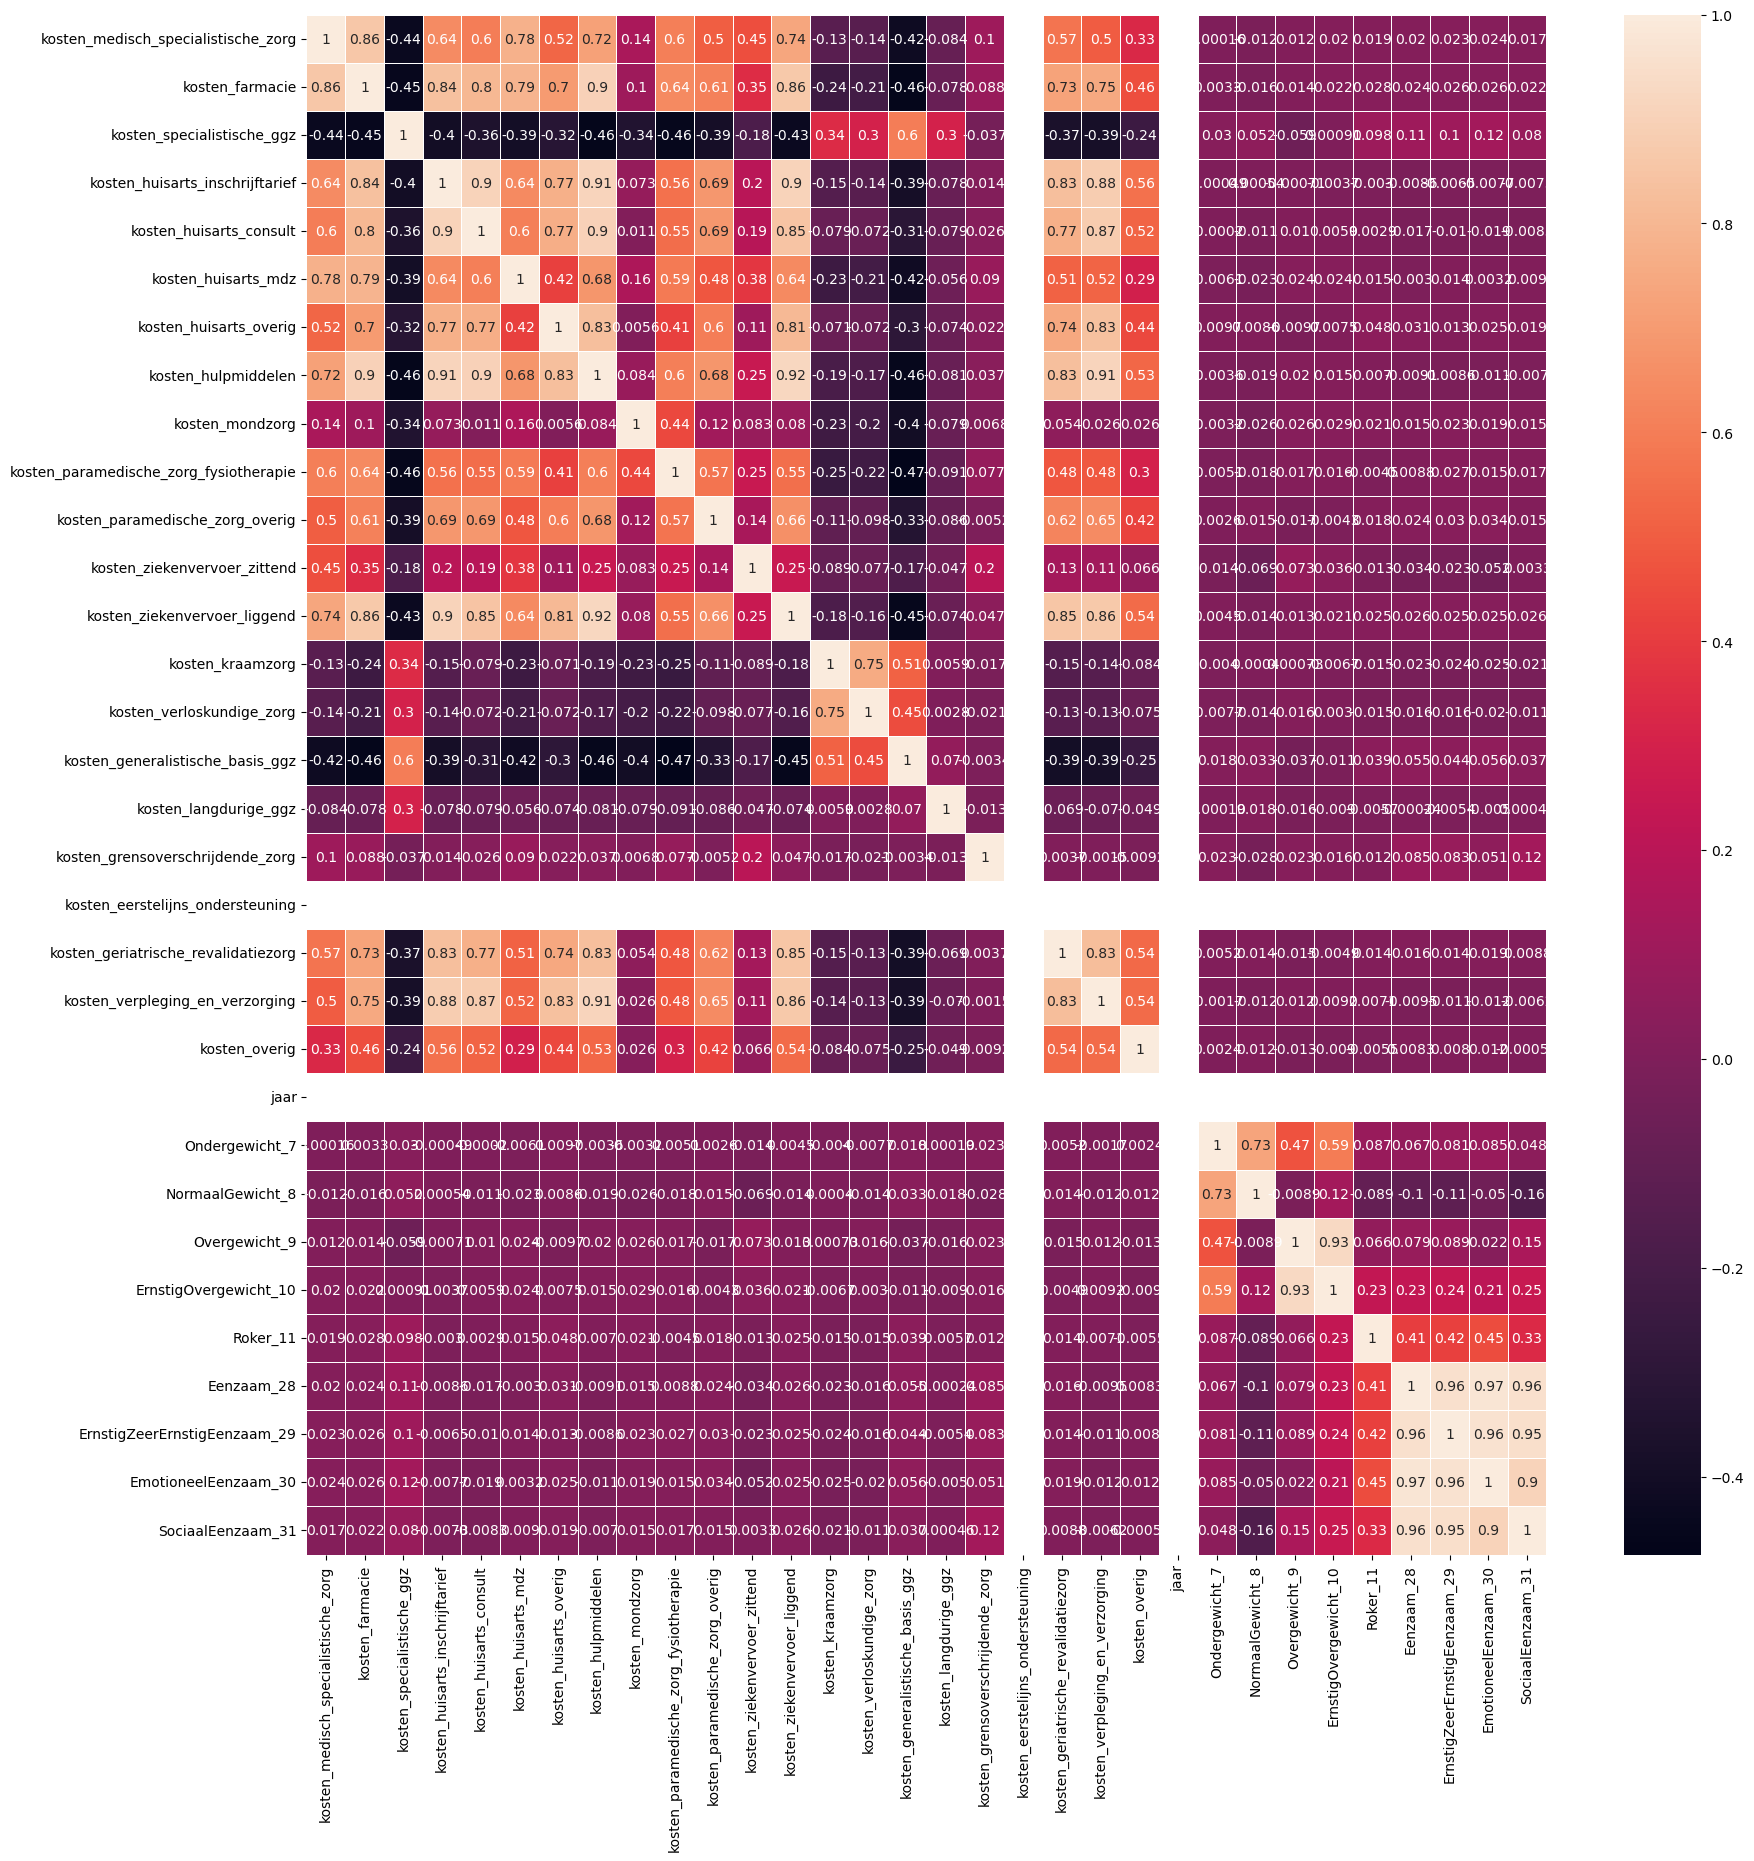

In [ ]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
